In [16]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000,28,28,1))

X_test.shape

(10000, 28, 28, 1)

In [5]:
from tensorflow.keras import layers, models
model = models.Sequential([
                           layers.Conv2D(32, kernel_size = (5,5), strides = (1,1),
                           padding = 'same', activation='relu', input_shape=(28,28,1)),
                           layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
                           layers.Conv2D(64, (2,2), activation='relu', padding='same'),
                           layers.MaxPooling2D(pool_size = (2,2)),
                           layers.Dropout(0.25),
                           layers.Flatten(),
                           layers.Dense(1000, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
import time

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, 
                 validation_data = (X_test, y_test))
print("fit time: ", time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0657 - val_accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0490 - val_accuracy: 0.9915
Epoch 3/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0387 - val_accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0384 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0384 - val_accuracy: 0.9933
fit time:  622.5530202388763


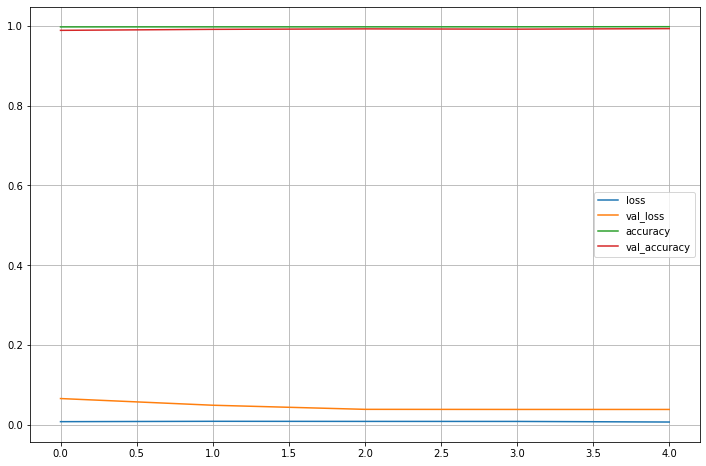

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0384 - accuracy: 0.9933
Test loss:  0.038381073623895645
Test accuracy:  0.9933000206947327


In [12]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [13]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

67

In [14]:
import random

samples= random.choices(population = wrong_result, k=16)
samples

[8094,
 3808,
 2414,
 3941,
 5331,
 9982,
 1393,
 2414,
 8094,
 6651,
 2130,
 1459,
 9634,
 684,
 6783,
 4505]

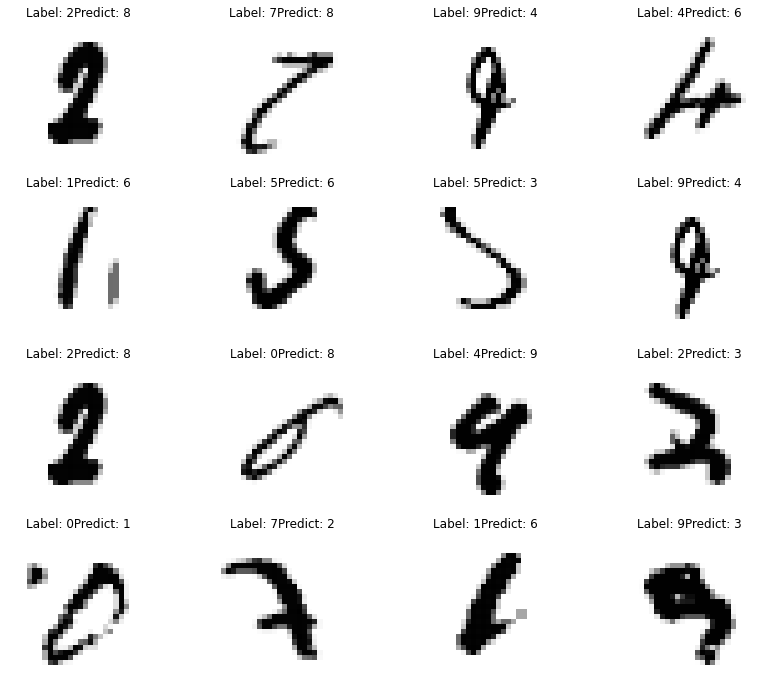

In [15]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx + 1)
  plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.title('Label: ' + str(y_test[n]) + 'Predict: ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()

In [ ]:
model.save('MNIST_CNN_model.h5')

In [ ]:
#in Fashion Mnist

from tensorflow.keras import datasets
mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000,28,28,1))

score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])